In [ ]:
!unzip "/content/drive/MyDrive/DL/cats and dogs.zip"

Archive:  /content/drive/MyDrive/DL/cats and dogs.zip
   creating: cats and dogs/
  inflating: cats and dogs/.DS_Store  
  inflating: cats and dogs/._.DS_Store  
   creating: cats and dogs/train/
  inflating: cats and dogs/train/.DS_Store  
  inflating: cats and dogs/train/._.DS_Store  
   creating: cats and dogs/train/cats/
  inflating: cats and dogs/train/cats/cat.999.jpg  
  inflating: cats and dogs/train/cats/cat.995.jpg  
  inflating: cats and dogs/train/cats/cat.997.jpg  
  inflating: cats and dogs/train/cats/cat.994.jpg  
  inflating: cats and dogs/train/cats/cat.998.jpg  
  inflating: cats and dogs/train/cats/cat.991.jpg  
  inflating: cats and dogs/train/cats/cat.993.jpg  
  inflating: cats and dogs/train/cats/cat.889.jpg  
  inflating: cats and dogs/train/cats/cat.860.jpg  
  inflating: cats and dogs/train/cats/cat.89.jpg  
  inflating: cats and dogs/train/cats/cat.840.jpg  
  inflating: cats and dogs/train/cats/cat.832.jpg  
  inflating: cats and dogs/train/cats/cat.996.jpg 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [ ]:
import os

train_cats_dir = 'cats and dogs/train/cats'
train_dogs_dir = 'cats and dogs/train/dogs'

test_cats_dir = 'cats and dogs/test/cats'
test_dogs_dir = 'cats and dogs/test/dogs'

In [ ]:
print('total train cat images:', len(os.listdir(train_cats_dir)))
print('total train dog images:', len(os.listdir(train_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total train cat images: 1002
total train dog images: 1000
total test cat images: 500
total test dog images: 500


In [ ]:
train_dir = 'cats and dogs/train'
test_dir = 'cats and dogs/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 2002 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Image Augmentation

train_datagen_augment = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
train_generator_augment = train_datagen_augment.flow_from_directory(train_dir,
                                                                    target_size=(150, 150),
                                                                    batch_size=32,
                                                                    class_mode='binary')

Found 2002 images belonging to 2 classes.


In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:

model2.compile(loss='binary_crossentropy',optimizer="rmsprop",metrics=['accuracy'])
history_aug = model2.fit_generator(train_generator_augment,epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
63/63 [==============================] - 16s 249ms/step - loss: 0.6245 - accuracy: 0.6568
Epoch 2/10
63/63 [==============================] - 15s 246ms/step - loss: 0.6122 - accuracy: 0.6738
Epoch 3/10
63/63 [==============================] - 15s 245ms/step - loss: 0.5854 - accuracy: 0.6823
Epoch 4/10
63/63 [==============================] - 15s 243ms/step - loss: 0.6024 - accuracy: 0.6758
Epoch 5/10
63/63 [==============================] - 18s 280ms/step - loss: 0.6170 - accuracy: 0.6813
Epoch 6/10
63/63 [==============================] - 15s 241ms/step - loss: 0.5918 - accuracy: 0.6998
Epoch 7/10
63/63 [==============================] - 15s 242ms/step - loss: 0.5775 - accuracy: 0.6933
Epoch 8/10
63/63 [==============================] - 15s 240ms/step - loss: 0.5761 - accuracy: 0.7128
Epoch 9/10
63/63 [==============================] - 15s 238ms/step - loss: 0.5744 - accuracy: 0.7003
Epoch 10/10
63/63 [==============================] - 15s 236ms/step - loss: 0.5606 - accura

In [ ]:
test_loss, test_accuracy = model2.evaluate(test_generator)
print(test_loss)
print(test_accuracy)

32/32 [==============================] - 3s 95ms/step - loss: 0.6383 - accuracy: 0.6420
0.6382784843444824
0.6420000195503235


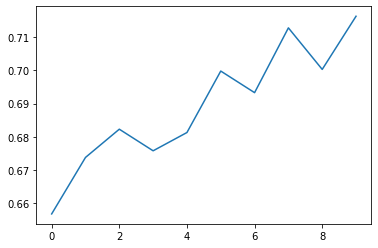

In [ ]:
plt.plot(history_aug.history['accuracy'])
plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

vgg16.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
model3 = Sequential()
model3.add(vgg16)
model3.add(Flatten())
model3.add(Dense(512, activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))
vgg16.trainable = False

In [ ]:
model3.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
history = model3.fit_generator(train_generator,epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


63/63 [==============================] - 9s 133ms/step - loss: 0.6753 - accuracy: 0.7707
Epoch 2/5
63/63 [==============================] - 7s 117ms/step - loss: 0.2159 - accuracy: 0.9121
Epoch 3/5
63/63 [==============================] - 7s 116ms/step - loss: 0.1678 - accuracy: 0.9366
Epoch 4/5
63/63 [==============================] - 7s 116ms/step - loss: 0.1103 - accuracy: 0.9575
Epoch 5/5
63/63 [==============================] - 7s 116ms/step - loss: 0.0795 - accuracy: 0.9785


In [ ]:
test_loss, test_accuracy = model3.evaluate(test_generator)
print(test_loss)
print(test_accuracy)

32/32 [==============================] - 5s 156ms/step - loss: 0.2832 - accuracy: 0.8780
0.2831801772117615
0.878000020980835


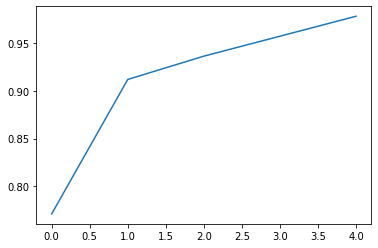

In [ ]:
plt.plot(history.history['accuracy'])
plt.show()

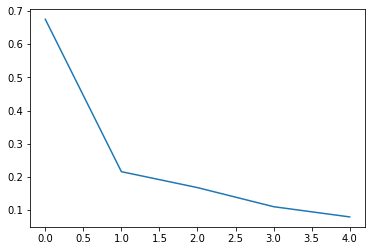

In [ ]:
plt.plot(history.history['loss'])
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

resnet.summary()

94781440/94765736 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat

In [ ]:
model_res = Sequential()
model_res.add(resnet)
model_res.add(Flatten())
model_res.add(Dense(512, activation="relu"))
model_res.add(Dropout(0.2))
model_res.add(Dense(1, activation='sigmoid'))
resnet.trainable = False

In [ ]:
model_res.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
history_res = model_res.fit_generator(train_generator,epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


63/63 [==============================] - 10s 109ms/step - loss: 0.6226 - accuracy: 0.6424
Epoch 2/20
63/63 [==============================] - 7s 110ms/step - loss: 0.6088 - accuracy: 0.6683
Epoch 3/20
63/63 [==============================] - 7s 110ms/step - loss: 0.5959 - accuracy: 0.6703
Epoch 4/20
63/63 [==============================] - 7s 112ms/step - loss: 0.5970 - accuracy: 0.6778
Epoch 5/20
63/63 [==============================] - 7s 117ms/step - loss: 0.5786 - accuracy: 0.6758
Epoch 6/20
63/63 [==============================] - 7s 111ms/step - loss: 0.5911 - accuracy: 0.6608
Epoch 7/20
63/63 [==============================] - 7s 111ms/step - loss: 0.5692 - accuracy: 0.6983
Epoch 8/20
63/63 [==============================] - 7s 111ms/step - loss: 0.5613 - accuracy: 0.7058
Epoch 9/20
63/63 [==============================] - 7s 111ms/step - loss: 0.6219 - accuracy: 0.6374
Epoch 10/20
63/63 [==============================] - 7s 111ms/step - loss: 0.5857 - accuracy: 0.6793
Epoch 11/

In [ ]:
test_loss, test_accuracy = model_res.evaluate(test_generator)
print(test_loss)
print(test_accuracy)

32/32 [==============================] - 5s 119ms/step - loss: 0.6298 - accuracy: 0.6390
0.6297628283500671
0.6389999985694885
